# 第十七次课后练习

**负责助教：朱轩宇**

<span style="color:red; font-weight:bold;">请将作业文件命名为 第十七次课后练习+姓名+学号.ipynb, 例如 第十七次课后练习+张三+1000000000.ipynb</span>


<span style="color:red; font-weight:bold;">在作业过程中觉得有心得或者自己拓展学习到有价值内容的，可以在文件名最后加一个#号。例如第十七次课后练习+张三+1000000000+#.ipynb</span>

# 第零部分 代码理解

请认真阅读代码，理解代码的功能，先写出预想的结果。运行并检验结果是否如预期。如果不如预期，请分析理解其中的原因

## **0.1** 创建变量
    阅读下面代码，观察运行的结果，解释出现这个结果的原因。

pytorch创建变量的语法与numpy有许多相似之处。下面列举了pytorch创建变量的一些常见用法：

In [2]:
import torch
import numpy as np

# 创建一个张量（tensor） # 使用torch.tensor()从Python列表创建一维张量，包含元素1,2,3,4
x = torch.tensor([1, 2, 3, 4])
print("x:", x)

# 创建一个矩阵（matrix） # 创建2x2的二维张量(矩阵)，包含元素[[1,2],[3,4]]
y = torch.tensor([[1, 2], [3, 4]])
print("y:", y)

# 创建一个全零的张量 # 创建2行3列的全零张量，zeros()函数接收形状元组作为参数
z = torch.zeros((2, 3))
print("z:", z)

# 创建一个随机初始化的张量 # 创建3x3的张量，元素从标准正态分布(均值0,方差1)随机采样
w = torch.randn((3, 3))
print("w:", w)

# pytorch tensor与numpy array的相互转换
numpy_array = np.array([1, 2, 3, 4, 5])

# 将NumPy数组转换为PyTorch张量
torch_tensor = torch.from_numpy(numpy_array)
print(torch_tensor)
# 使用from_numpy()将numpy数组转换为PyTorch张量，注意会共享内存！！！！！修改一个会影响另一个！！！！

# 将PyTorch张量转换为NumPy数组
numpy_array = torch_tensor.numpy()
print(numpy_array)
# 使用.numpy()方法将PyTorch张量转回numpy数组，同样共享内存！！！！！

x: tensor([1, 2, 3, 4])
y: tensor([[1, 2],
        [3, 4]])
z: tensor([[0., 0., 0.],
        [0., 0., 0.]])
w: tensor([[-0.7389, -1.0552, -1.1598],
        [-0.4205, -0.2697, -0.3969],
        [-1.1477,  1.1715, -0.9757]])
tensor([1, 2, 3, 4, 5])
[1 2 3 4 5]


## **0.2** 算术运算
    阅读下面代码，观察运行的结果，解释出现这个结果的原因。

In [ ]:
import torch

# 创建一个服从标准正态分布的3*4的张量A
A = torch.randn((3, 4))
print("A:", A)

# 创建一个服从标准正态分布的2*6的张量B
B = torch.randn((2, 6))
print("B:", B)

# 使用view操作将B的形状也转换成3*4，计算A+B和A*B^T（矩阵乘法）
B = B.view(3, 4)
print("A+B:", A + B) # view()改变张量形状，然后进行逐元素相加
print("A*B^T:", A.matmul(B.t())) # matmul()函数进行 矩阵乘法 ，t()函数转置B。B.t()是B的转置(4x3)，结果得到3x3矩阵A*B.T

# 取出矩阵A的所有大于0的值，并按照行的顺序排列成一个一维的张量C。
# 例如：[[0, 0.1, 0.2], [-0.3, 0.4, -0.5]]需要转换成[0.1, 0.2, 0.4]
C = A[A > 0]
print("C:", C) # 与np的np.where()类似，返回一个 一维 张量，包含A中所有大于0的元素

# 将C的每个元素平方，得到D。计算D的平均值mean(D)，并求出mean(D)对A的梯度
D = C ** 2
D = D.clone().detach().requires_grad_(True)  # 需指定requires_grad=True，否则无法求梯度！！
print("D:", D)
print("mean(D):", D.mean())
D.mean().backward()
print("A.grad:", A.grad) # 对D计算均值并反向传播求梯度，但这里A.grad会是None因为A的requires_grad=False

# 将A中所有大于零的数置为零并输出
A[A > 0] = 0
print("A:", A)

# 使用detach方法将一个张量A从计算图中分离出来，并将其转换为一个不需要梯度的张量B
A = torch.randn((3, 4), requires_grad=True)
B = A.detach() # detach()创建与A共享数据但不参与梯度计算的新张量
print("A.requires_grad:", A.requires_grad)
print("B.requires_grad:", B.requires_grad)

# 使用with torch.no_grad()包装一个计算过程，使得其中的计算不会被记录到计算图中
with torch.no_grad(): # no_grad()上下文管理器内所有计算不会记录梯度
    C = A + 2
    print("C.requires_grad:", C.requires_grad)


A: tensor([[ 0.9333, -0.7042,  0.3990,  1.1330],
        [ 1.3804,  2.1086, -0.9568, -0.2854],
        [ 0.1508, -1.6780,  1.8978,  2.1753]])
B: tensor([[-2.4462, -1.7210, -0.8131, -0.9199,  0.9347, -0.3940],
        [ 1.0620, -0.8865, -0.8445, -1.1543,  0.7998,  1.1198]])
A+B: tensor([[-1.5129, -2.4252, -0.4141,  0.2131],
        [ 2.3152,  1.7146,  0.1052, -1.1719],
        [-0.6937, -2.8323,  2.6976,  3.2951]])
A*B^T: tensor([[-2.4377,  0.5692,  1.6126],
        [-5.9652, -0.3037, -4.6847],
        [-1.0252,  0.8894,  5.7634]])
C: tensor([0.9333, 0.3990, 1.1330, 1.3804, 2.1086, 0.1508, 1.8978, 2.1753])
D: tensor([0.8710, 0.1592, 1.2837, 1.9056, 4.4463, 0.0227, 3.6017, 4.7318],
       requires_grad=True)
mean(D): tensor(2.1278, grad_fn=<MeanBackward0>)
A.grad: None
A: tensor([[ 0.0000, -0.7042,  0.0000,  0.0000],
        [ 0.0000,  0.0000, -0.9568, -0.2854],
        [ 0.0000, -1.6780,  0.0000,  0.0000]])
A.requires_grad: True
B.requires_grad: False
C.requires_grad: False


## **0.3** 神经网络模型设计基本框架
    阅读下面代码，观察运行的结果，解释出现这个结果的原因。

背景​：构建一个神经网络来实现20个特征，3个类别的自动化分类。

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### 1. 数据加载与预处理

自定义Dataset类

**核心作用**：将原始数据转换为适合PyTorch处理的张量格式，并实现规范化的数据访问接口，主要有以下作用：

1. **统一数据接口**  
   PyTorch的`DataLoader`只能识别遵循Dataset协议的数据容器，自定义Dataset可将任意格式数据转换为标准格式

2. **数据预处理流水线**  
   在数据载入阶段集中实现：数据标准化、数据增强（如添加噪声）、格式转换等预处理操作

3. **延迟加载（Lazy Loading）**  
   对于无法一次加载到内存的大数据集，可在`__getitem__`中按需读取文件

4. **多阶段数据处理**  
   根据不同阶段（训练/验证）切换数据处理方式（如是否启用数据增强）

---

所有自定义Dataset必须继承`torch.utils.data.Dataset`，并实现以下三个核心方法：

**1. `__init__`方法**

作用：  
- 接收原始数据并进行初步处理（如类型转换）
- 缓存必要的数据增强参数（如是否进行数据增强）

**2. `__len__`方法**

作用：  
- 返回数据集的总长度
- DataLoader根据这个值计算批次数目

**3. `__getitem__`方法**

作用：  
- 返回指定索引对应的样本（特征+标签）
- 可在此处实现动态数据增强（每次读取时随机处理）
- 若处理大文件（如图像），应在此处读取文件内容

---

In [2]:
# 生成示例数据集（10000个样本，20个特征，3个类别）
X, y = make_classification(n_samples=10000, n_features=20, n_classes=3, n_informative=8, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# 使用sklearn生成模拟分类数据集，10000样本，20特征，3类，8个有效特征
# 将数据分为训练集(64%)、验证集(16%)和测试集(20%)

# 数据标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

# 自定义Dataset类
class CropDataset(Dataset):
    def __init__(self, features, labels, augment=False):
        self.features = torch.FloatTensor(features)
        self.labels = torch.LongTensor(labels)
        self.augment = augment
        
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        x = self.features[idx]
        y = self.labels[idx]
        
        # 数据增强：添加随机噪声
        if self.augment:
            x += torch.randn_like(x) * 0.1
            
        return x, y
# 实现数据加载和可选的数据增强(添加噪声)

自定义Dataset类需要与DataLoader的配合使用，创建DataLoader

In [3]:
# 创建DataLoader
train_dataset = CropDataset(X_train, y_train, augment=True)
val_dataset = CropDataset(X_val, y_val, augment=False)
test_dataset = CropDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True) # 打乱
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

### 2. 神经网络模型定义

构建一个三层的全连接神经网络，输入20维特征，通过128→64→3的维度递减结构，使用ReLU激活引入非线性，最终Sigmoid输出三分类概率。结构简明，适用于中小型分类任务，实现特征逐层抽象与非线性映射。

关键要素：  
1. **架构**：20→128→64→3的全连接层堆叠  
2. **激活**：隐层ReLU防止梯度消失，输出Sigmoid生成概率  

In [4]:
# 定义神经网络模型
class DiseaseClassifier(nn.Module):
    def __init__(self, input_size=20):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, 128),  # 全连接层 # input*128
            nn.ReLU(),                   # 激活层
            nn.Linear(128, 64), # 128*64
            nn.ReLU(),
            nn.Linear(64, 3), # 64*3
        )

        # 初始化权重
        for m in self.net.modules():
            if isinstance(m, nn.Linear):
                torch.nn.init.xavier_uniform_(m.weight)
                m.bias.data.fill_(0.01)
    # 定义三层的全连接网络，使用Xavier初始化权重，偏置都初始化为0.01

    def forward(self, x):
        return self.net(x)

### 3. 优化器与学习策略

先初始化一个三分类神经网络，然后使用交叉熵损失函数和带动量的随机梯度下降优化器（初始学习率0.01），并配置每5轮学习率减半的衰减策略，以优化训练过程。

In [ ]:
# 初始化模型、损失函数和优化器
model = DiseaseClassifier()
criterion = nn.CrossEntropyLoss() # 交叉熵里面已经有log_softmax了，所以不需要再手动添加softmax层
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9) # 使用交叉熵损失函数，随机梯度下降优化器，学习率0.01，动量0.9
# momentum是动量项，通常设置为0.9左右，控制着前几次迭代梯度对当前更新的影响程度。 v_t+1 = momentum * v_t - lr * gradient_t
# 学习率调度器
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5) # 使用带动量的SGD优化器，每5个epoch学习率减半

### 4. 训练与验证

函数train_model接收模型、损失函数、优化器、学习率调度器和训练轮数作为参数。然后进入循环，每个epoch分为训练阶段和验证阶段。

在训练阶段，模型设置为训练模式，遍历训练数据加载器，执行前向传播、计算损失、反向传播和优化器步骤。接着，学习率调度器更新学习率。

验证阶段则切换模型为评估模式，禁用梯度计算，计算验证集的准确率，并保存最佳模型。

In [6]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=20):
    best_acc = 0.0
    
    for epoch in range(num_epochs):
        # 训练阶段
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        # 前向传播，计算损失，反向传播，更新参数，损失累加

        # 更新学习率！
        scheduler.step()
        
        # 验证阶段
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad(): # 禁用梯度计算
            for inputs, labels in val_loader:
                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        accuracy = correct / total # 正确率
        print(f"Epoch {epoch+1}/{num_epochs} | Loss: {running_loss/len(train_loader):.4f} | Acc: {accuracy:.4f}")
        
        # 保存最佳模型
        if accuracy > best_acc:
            best_acc = accuracy
            torch.save(model.state_dict(), "best_model.pth")
    
    print(f"Best Validation Accuracy: {best_acc:.4f}")
# 训练过程包括前向传播、损失计算、反向传播、参数更新，并在验证集上评估

# 执行训练
train_model(model, criterion, optimizer, scheduler)

Epoch 1/20 | Loss: 0.7792 | Acc: 0.7625
Epoch 2/20 | Loss: 0.5387 | Acc: 0.7919
Epoch 3/20 | Loss: 0.4679 | Acc: 0.8175
Epoch 4/20 | Loss: 0.4205 | Acc: 0.8356
Epoch 5/20 | Loss: 0.3947 | Acc: 0.8313
Epoch 6/20 | Loss: 0.3712 | Acc: 0.8431
Epoch 7/20 | Loss: 0.3701 | Acc: 0.8562
Epoch 8/20 | Loss: 0.3714 | Acc: 0.8594
Epoch 9/20 | Loss: 0.3736 | Acc: 0.8619
Epoch 10/20 | Loss: 0.3758 | Acc: 0.8638
Epoch 11/20 | Loss: 0.3733 | Acc: 0.8681
Epoch 12/20 | Loss: 0.3753 | Acc: 0.8694
Epoch 13/20 | Loss: 0.3805 | Acc: 0.8675
Epoch 14/20 | Loss: 0.3831 | Acc: 0.8694
Epoch 15/20 | Loss: 0.3907 | Acc: 0.8669
Epoch 16/20 | Loss: 0.3932 | Acc: 0.8725
Epoch 17/20 | Loss: 0.4022 | Acc: 0.8706
Epoch 18/20 | Loss: 0.4087 | Acc: 0.8712
Epoch 19/20 | Loss: 0.4127 | Acc: 0.8700
Epoch 20/20 | Loss: 0.4201 | Acc: 0.8706
Best Validation Accuracy: 0.8725


### 5. 测试与调优任务

In [7]:
# 测试函数模板
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

# 加载最佳模型
best_model = DiseaseClassifier()
best_model.load_state_dict(torch.load("best_model.pth"))
final_acc = test_model(best_model, test_loader)
print(f"Final Test Accuracy: {final_acc:.4f}")
# 在测试集上评估保存的最佳模型性能

Final Test Accuracy: 0.8535


# 第一部分 基础练习

接下来需要对于上面的模型实现以下任务：

- 任务1：修改网络结构增加至4个全连接层
- 任务2：尝试不同的激活函数（如LeakyReLU）
- 任务3：比较不同优化器（Adam vs SGD）的效果
- 任务4：添加L2正则化（weight decay）

并对结果对比分析

任务1:修改网络结构增加至4个全连接层，节点数为128→64→32→3，使用LeakyReLU激活函数。
    
任务2: 尝试不同的激活函数（如LeakyReLU）

In [86]:
# 定义神经网络模型
class DiseaseClassifier(nn.Module):
    def __init__(self, input_size=20):
        super().__init__()
        ########################
        # TODO: 定义神经网络
        self.net = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.LeakyReLU(),
            nn.Linear(128, 64),
            nn.LeakyReLU(),
            nn.Linear(64, 32),
            nn.LeakyReLU(),
            nn.Linear(32, 3),
            nn.Sigmoid() 
        )
        ########################
        # 初始化权重
        for m in self.net.modules():
            if isinstance(m, nn.Linear):
                torch.nn.init.xavier_uniform_(m.weight)
                m.bias.data.fill_(0.01)
    
    def forward(self, x):
        return self.net(x)

任务3：比较不同优化器（Adam vs SGD）的效果

任务4：添加L2正则化（weight decay）

In [87]:
# 初始化模型、损失函数和优化器
model = DiseaseClassifier()
criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
###################
# TODO: 定义Adam优化器，并添加L2正则化 weight_decay
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.001) # Adam优化器，学习率0.001，L2正则化系数0.001
###################

# 学习率调度器
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

**增加早停机制（Early Stopping）**

早停机制是一种常用的正则化技术，旨在防止深度学习模型过拟合。当模型在训练过程中，验证集上的性能不再提升或开始下降时，早停机制会提前终止训练过程，从而避免模型对训练数据过度拟合。

**原理**

在模型训练过程中，随着迭代次数增加：
* 训练误差通常会持续下降
* 验证误差会先下降，然后在某个点开始上升

早停机制的核心思想是在验证误差开始上升前停止训练，此时模型往往具有最佳的泛化性能。

**实现方法**

1. **设置耐心参数**（patience）：允许模型在验证性能不再提升的情况下继续训练的轮数
2. **性能指标监控**：通常监控验证集上的损失值或准确率
3. **定期评估**：每个训练周期结束后评估模型在验证集上的性能
4. **终止条件**：如果连续多个周期（由patience参数指定）验证性能没有改善，则停止训练
5. **保存最佳模型**：保存在验证集上性能最好的模型参数

**优势**

- **提高泛化能力**：防止模型过拟合，提高在未见数据上的表现
- **减少计算资源**：避免不必要的训练时间和计算资源浪费
- **自动化训练过程**：减少人工干预，使模型训练更加自动化


In [88]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=100):
    best_acc = 0.0
    best_loss = None
    patience = 0
    for epoch in range(num_epochs):
        # 训练阶段
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        # 更新学习率
        scheduler.step()
        
        # 验证阶段
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        accuracy = correct / total
        print(f"Epoch {epoch+1}/{num_epochs} | Loss: {running_loss/len(train_loader):.4f} | Acc: {accuracy:.4f}")

        # 早停机制
        if best_loss is None or running_loss < best_loss:
            best_loss = running_loss
            patience = 0
        else:
            patience += 1
            if patience > 10:
                print("Early stopping...")
                break


        # 保存最佳模型
        if accuracy > best_acc:
            best_acc = accuracy
            torch.save(model.state_dict(), "best_model.pth")
    
    print(f"Best Validation Accuracy: {best_acc:.4f}")

# 执行训练
train_model(model, criterion, optimizer, scheduler)

Epoch 1/100 | Loss: 1.0753 | Acc: 0.6556
Epoch 2/100 | Loss: 1.0347 | Acc: 0.7113
Epoch 3/100 | Loss: 1.0234 | Acc: 0.7194
Epoch 4/100 | Loss: 1.0142 | Acc: 0.7194
Epoch 5/100 | Loss: 1.0071 | Acc: 0.7269
Epoch 6/100 | Loss: 0.9965 | Acc: 0.7275
Epoch 7/100 | Loss: 0.9915 | Acc: 0.7256
Epoch 8/100 | Loss: 0.9878 | Acc: 0.7250
Epoch 9/100 | Loss: 0.9858 | Acc: 0.7181
Epoch 10/100 | Loss: 0.9823 | Acc: 0.7206
Epoch 11/100 | Loss: 0.9758 | Acc: 0.7156
Epoch 12/100 | Loss: 0.9732 | Acc: 0.7137
Epoch 13/100 | Loss: 0.9718 | Acc: 0.7219
Epoch 14/100 | Loss: 0.9701 | Acc: 0.7212
Epoch 15/100 | Loss: 0.9697 | Acc: 0.7163
Epoch 16/100 | Loss: 0.9651 | Acc: 0.7050
Epoch 17/100 | Loss: 0.9651 | Acc: 0.7131
Epoch 18/100 | Loss: 0.9646 | Acc: 0.7194
Epoch 19/100 | Loss: 0.9640 | Acc: 0.7169
Epoch 20/100 | Loss: 0.9630 | Acc: 0.7163
Epoch 21/100 | Loss: 0.9613 | Acc: 0.7087
Epoch 22/100 | Loss: 0.9612 | Acc: 0.7081
Epoch 23/100 | Loss: 0.9609 | Acc: 0.7087
Epoch 24/100 | Loss: 0.9608 | Acc: 0.7156
E

In [89]:
# 测试函数模板
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

# 加载最佳模型
best_model = DiseaseClassifier()
best_model.load_state_dict(torch.load("best_model.pth"))
final_acc = test_model(best_model, test_loader)
print(f"Final Test Accuracy: {final_acc:.4f}")

Final Test Accuracy: 0.7370


Adam优化器在测试集上的Accuracy：0.7855

SGD优化器在测试集上的Accuracy：0.7680

多次运行结果不一样，越运行效果越差（有极大差异）。

# 第二部分 进阶练习

## **2.1** 基于FasionMNIST的图像分类任务

FashionMNIST 是一个广泛用于测试机器学习算法的图像数据集，特别是在图像识别领域。它由 Zalando 发布，旨在替代传统的 MNIST 数据集，后者主要包含手写数字的图片。FashionMNIST 的设计初衷是提供一个稍微更具挑战性的问题，同时保持与原始 MNIST 数据集相同的图像大小（28x28 像素）和结构（训练集60,000张图片，测试集10,000张图片）。

FashionMNIST 包含来自 10 个类别的服装和鞋类商品的灰度图像。这些类别包括：

- T恤/上衣（T-shirt/top）
- 裤子（Trouser）
- 套头衫（Pullover）
- 裙子（Dress）
- 外套（Coat）
- 凉鞋（Sandal）
- 衬衫（Shirt）
- 运动鞋（Sneaker）
- 包（Bag）
- 短靴（Ankle boot）

每个类别都有相同数量的图像，使得这个数据集成为一个平衡的数据集。这些图像的简单性和标准化尺寸使得 FashionMNIST 成为计算机视觉和机器学习领域入门级的理想选择。数据集被广泛用于教育和研究，用于测试各种图像识别方法的效果。

In [22]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
from matplotlib import pyplot as plt
torch.manual_seed(0)
np.random.seed(0)

In [23]:
training_data = datasets.FashionMNIST(
    root="./", train=True, download=True, transform=ToTensor())
test_data = datasets.FashionMNIST(
    root="./", train=False, download=True, transform=ToTensor())

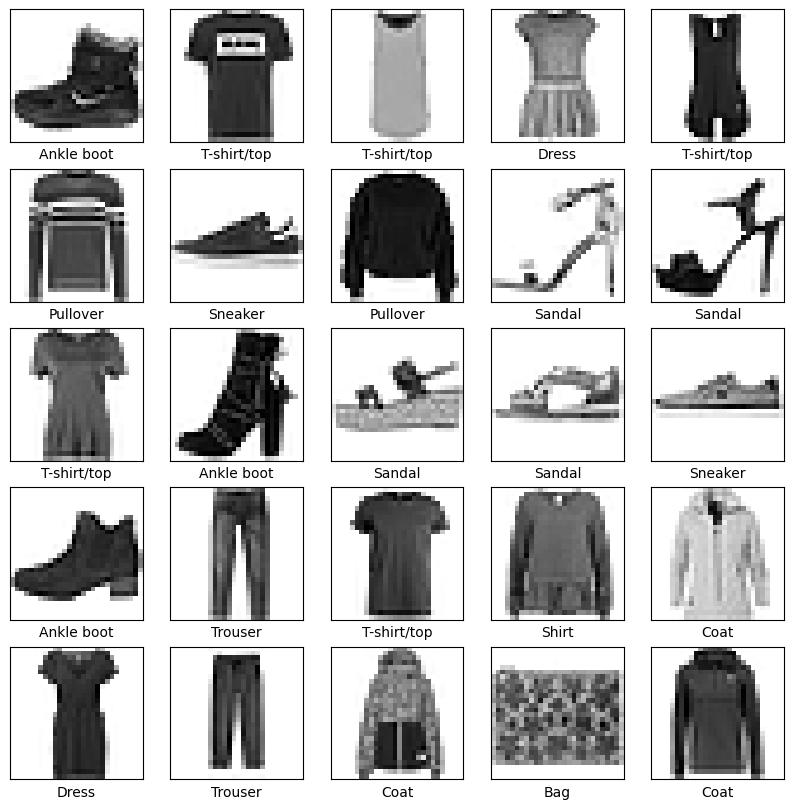

In [24]:
# 进行简单的可视化
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(training_data[i][0].squeeze(0), cmap=plt.cm.binary)
    plt.xlabel(labels[training_data[i][1]])
plt.show()

In [106]:
BATCH_SIZE = 64
LEARNING_RATE = 0.001
EPOCHS = 10

In [107]:
# TODO 数据加载器
train_dataloader = DataLoader(training_data, batch_size = BATCH_SIZE, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = BATCH_SIZE, shuffle = True)

In [108]:
# TODO 按照下图定义模型
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.net = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 10),
            nn.LogSoftmax(dim = 1)
        )
        for layer in self.net:
            if isinstance(layer, nn.Linear):
                nn.init.xavier_uniform_(layer.weight)
                layer.bias.data.fill_(0.01)
        
    def forward(self, x):
        x = self.flatten(x)
        return self.net(x)


<?xml version="1.0" standalone="no"?>
<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" width="192pt" height="337pt" viewBox="0.00 0.00 192.15 337">
<g id="graph0" class="graph" transform="translate(13.086503072123655,316.16394050517243) scale(0.8420629536084173)" data-name="G">

<polygon fill="white" stroke="none" points="-4,4 -4,-333 188.15,-333 188.15,4 -4,4"/>
<!-- input -->
<g id="node1" class="node" pointer-events="visible" data-name="input">

<polygon fill="none" stroke="black" points="0,-292.5 0,-328.5 184.15,-328.5 184.15,-292.5 0,-292.5"/>
<text text-anchor="middle" x="22.78" y="-306.3" font-family="Times,serif" font-size="14.00">Input</text>
<polyline fill="none" stroke="black" points="45.55,-292.5 45.55,-328.5"/>
<text text-anchor="middle" x="114.85" y="-306.3" font-family="Times,serif" font-size="14.00">(Flatten到28*28=784)</text>
</g>
<!-- fc1 -->
<g id="node2" class="node" pointer-events="visible" data-name="fc1">

<polygon fill="none" stroke="black" points="34.9,-219.5 34.9,-255.5 149.25,-255.5 149.25,-219.5 34.9,-219.5"/>
<text text-anchor="middle" x="92.08" y="-233.4" font-family="Times,serif" font-size="14.00">Linear(784→128)</text>
</g>
<!-- input&#45;&gt;fc1 -->
<g id="edge1" class="edge" data-name="input-&gt;fc1">

<path fill="none" stroke="black" d="M92.08,-292.67C92.08,-284.89 92.08,-275.44 92.08,-266.62"/>
<polygon fill="black" stroke="black" points="95.58,-266.72 92.08,-256.72 88.58,-266.72 95.58,-266.72"/>
</g>
<!-- relu -->
<g id="node3" class="node" pointer-events="visible" data-name="relu">

<polygon fill="none" stroke="black" points="65.08,-146.5 65.08,-182.5 119.08,-182.5 119.08,-146.5 65.08,-146.5"/>
<text text-anchor="middle" x="91.68" y="-160.3" font-family="Times,serif" font-size="14.00">ReLU</text>
</g>
<!-- fc1&#45;&gt;relu -->
<g id="edge2" class="edge" data-name="fc1-&gt;relu">

<path fill="none" stroke="black" d="M92.08,-219.67C92.08,-211.89 92.08,-202.44 92.08,-193.62"/>
<polygon fill="black" stroke="black" points="95.58,-193.72 92.08,-183.72 88.58,-193.72 95.58,-193.72"/>
</g>
<!-- fc2 -->
<g id="node4" class="node" pointer-events="visible" data-name="fc2">

<polygon fill="none" stroke="black" points="38.4,-73.5 38.4,-109.5 145.75,-109.5 145.75,-73.5 38.4,-73.5"/>
<text text-anchor="middle" x="92.08" y="-87.4" font-family="Times,serif" font-size="14.00">Linear(128→10)</text>
</g>
<!-- relu&#45;&gt;fc2 -->
<g id="edge3" class="edge" data-name="relu-&gt;fc2">

<path fill="none" stroke="black" d="M92.08,-146.67C92.08,-138.89 92.08,-129.44 92.08,-120.62"/>
<polygon fill="black" stroke="black" points="95.58,-120.72 92.08,-110.72 88.58,-120.72 95.58,-120.72"/>
</g>
<!-- output -->
<g id="node5" class="node" pointer-events="visible" data-name="output">

<polygon fill="none" stroke="black" points="64.63,-0.5 64.63,-36.5 119.52,-36.5 119.52,-0.5 64.63,-0.5"/>
<text text-anchor="middle" x="92.08" y="-14.3" font-family="Times,serif" font-size="14.00">Output</text>
</g>
<!-- fc2&#45;&gt;output -->
<g id="edge4" class="edge" data-name="fc2-&gt;output">

<path fill="none" stroke="black" d="M92.08,-73.67C92.08,-65.89 92.08,-56.44 92.08,-47.62"/>
<polygon fill="black" stroke="black" points="95.58,-47.72 92.08,-37.72 88.58,-47.72 95.58,-47.72"/>
</g>
</g>
</svg>

In [116]:
# TODO 创建模型，并选择合适的优化器和损失函数
model = Net()
optimizer = optim.Adam(model.parameters(), lr = LEARNING_RATE, weight_decay = 0.0001)
criterion = nn.NLLLoss()

In [ ]:
# TODO 模型训练过程
def train(model, train_dataloader, optimizer, criterion):
    model.train()
    train_loss = 0
    correct = 0
    total = 0
    for batch, (data, target) in enumerate(train_dataloader):
        #***********************************
        # 请在此处添加代码，完成模型训练过程
        # 以下代码重要
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = output.max(1) # 取出每行最大值的索引
        total += target.size(0) # 计算总样本数
        correct += (predicted == target).sum().item() # 也可以用predicted.eq(target).sum().item()
        # 计算正确预测的样本数(predicted.eq(target)返回一个布尔值张量，sum()计算True的数量)
        #***********************************
    return train_loss / len(train_dataloader), 100. * correct / total

def test(model, test_dataloader, criterion):
    model.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch, (data, target) in enumerate(test_dataloader):
            #***********************************
            # 请在此处添加代码，完成模型测试过程
            output = model(data)
            loss = criterion(output, target)
            test_loss += loss.item()
            _, predicted = output.max(1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
            #***********************************
    return test_loss / len(test_dataloader), 100. * correct / total

Epoch 1/10, Train Loss: 0.5206, Train Acc: 81.83%, Test Loss: 0.4502, Test Acc: 84.10%
Epoch 2/10, Train Loss: 0.3874, Train Acc: 86.28%, Test Loss: 0.4031, Test Acc: 85.64%
Epoch 3/10, Train Loss: 0.3497, Train Acc: 87.45%, Test Loss: 0.3825, Test Acc: 86.20%
Epoch 4/10, Train Loss: 0.3266, Train Acc: 88.20%, Test Loss: 0.3581, Test Acc: 87.40%
Epoch 5/10, Train Loss: 0.3091, Train Acc: 88.77%, Test Loss: 0.3547, Test Acc: 87.58%
Epoch 6/10, Train Loss: 0.2973, Train Acc: 89.13%, Test Loss: 0.3407, Test Acc: 87.79%
Epoch 7/10, Train Loss: 0.2881, Train Acc: 89.51%, Test Loss: 0.3565, Test Acc: 87.15%
Epoch 8/10, Train Loss: 0.2769, Train Acc: 89.84%, Test Loss: 0.3511, Test Acc: 87.38%
Epoch 9/10, Train Loss: 0.2691, Train Acc: 90.16%, Test Loss: 0.3483, Test Acc: 87.45%
Epoch 10/10, Train Loss: 0.2630, Train Acc: 90.22%, Test Loss: 0.3404, Test Acc: 87.86%


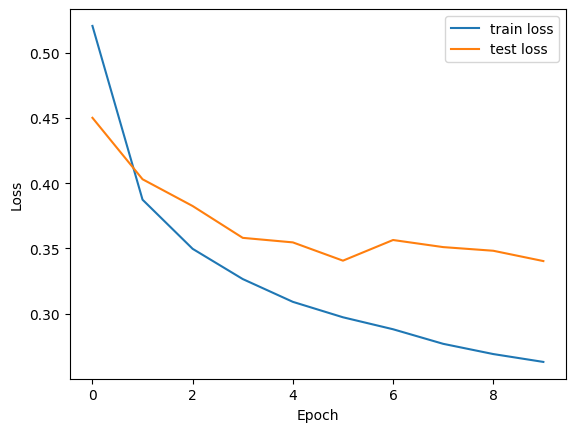

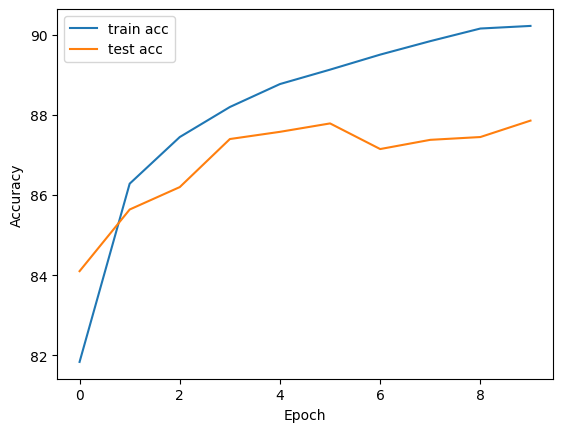

In [118]:
# 训练模型
def train_and_test(model, train_dataloader, test_dataloader, optimizer, criterion):
    train_loss_list = []
    train_acc_list = []
    test_loss_list = []
    test_acc_list = []
    for epoch in range(EPOCHS):
        train_loss, train_acc = train(model, train_dataloader, optimizer, criterion)
        test_loss, test_acc = test(model, test_dataloader, criterion)
        print(f"Epoch {epoch+1}/{EPOCHS}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")
        train_loss_list.append(train_loss)
        train_acc_list.append(train_acc)
        test_loss_list.append(test_loss)
        test_acc_list.append(test_acc)

    # 可视化训练过程
    plt.figure()
    plt.plot(train_loss_list, label='train loss')
    plt.plot(test_loss_list, label='test loss')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

    plt.figure()
    plt.plot(train_acc_list, label='train acc')
    plt.plot(test_acc_list, label='test acc')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.show()

    # 保存模型
    torch.save(model.state_dict(), 'model.pth')

    # 加载模型
    model = Net()
    model.load_state_dict(torch.load('model.pth'))

train_and_test(model, train_dataloader, test_dataloader, optimizer, criterion)

## 模型调优与参数优化
### 修改网络结构，**加入卷积层与池化层**。

In [ ]:
class Net0(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size = 3, padding = 1), # 输入：1通道，输出：32通道 # 28*28*1 -> 28*28*32
            nn.BatchNorm2d(32), # 批归一化
            nn.LeakyReLU(),
            nn.MaxPool2d(kernel_size = 2), # subsampling, 28*28*32 -> 14*14*32
            nn.Conv2d(32, 64, kernel_size = 3, padding = 1), # 14*14*32 -> 14*14*64
            nn.BatchNorm2d(64), # 2d是因为输入是2维的图像数据
            nn.LeakyReLU(),
            nn.MaxPool2d(kernel_size = 2), # 14*14*64 -> 7*7*64
            nn.Dropout(0.25), # 丢弃25% neurons
            
            # 以下是FC
            nn.Flatten(), # 要先展平再输入到FC层
            nn.Linear(64 * 7 * 7, 128),
            nn.BatchNorm1d(128), # 1d是因为输入是展平后的向量，是1维
            nn.LeakyReLU(),
            nn.Linear(128, 10),
            nn.LogSoftmax(dim = 1)
        )

        for layer in self.net:
            if isinstance(layer, nn.Linear):
                nn.init.xavier_uniform_(layer.weight)
                layer.bias.data.fill_(0.01)
            elif isinstance(layer, nn.Conv2d):
                nn.init.kaiming_uniform_(layer.weight, nonlinearity='leaky_relu')
                layer.bias.data.fill_(0.01)
            # nn.init.kaiming_uniform_()是针对Leaky_ReLU激活函数的初始化方法，适用于卷积层
            # nn.init.xavier_uniform_()是针对sigmoid和tanh激活函数的初始化方法，适用于全连接层

    def forward(self, x):
        return self.net(x)

Epoch 1/15, Train Loss: 0.3618, Train Acc: 87.00%, Test Loss: 0.2876, Test Acc: 88.83%
Epoch 2/15, Train Loss: 0.2544, Train Acc: 90.67%, Test Loss: 0.2480, Test Acc: 91.28%
Epoch 3/15, Train Loss: 0.2202, Train Acc: 91.88%, Test Loss: 0.2281, Test Acc: 91.69%
Epoch 4/15, Train Loss: 0.1943, Train Acc: 92.84%, Test Loss: 0.2337, Test Acc: 91.76%
Epoch 5/15, Train Loss: 0.1801, Train Acc: 93.36%, Test Loss: 0.2242, Test Acc: 92.09%
Epoch 6/15, Train Loss: 0.1647, Train Acc: 93.89%, Test Loss: 0.2575, Test Acc: 91.16%
Epoch 7/15, Train Loss: 0.1538, Train Acc: 94.33%, Test Loss: 0.2087, Test Acc: 92.80%
Epoch 8/15, Train Loss: 0.1410, Train Acc: 94.80%, Test Loss: 0.2189, Test Acc: 92.25%
Epoch 9/15, Train Loss: 0.1330, Train Acc: 95.04%, Test Loss: 0.2146, Test Acc: 92.52%
Epoch 10/15, Train Loss: 0.1221, Train Acc: 95.45%, Test Loss: 0.2112, Test Acc: 92.75%
Epoch 11/15, Train Loss: 0.1148, Train Acc: 95.77%, Test Loss: 0.2245, Test Acc: 92.34%
Epoch 12/15, Train Loss: 0.1104, Train Ac

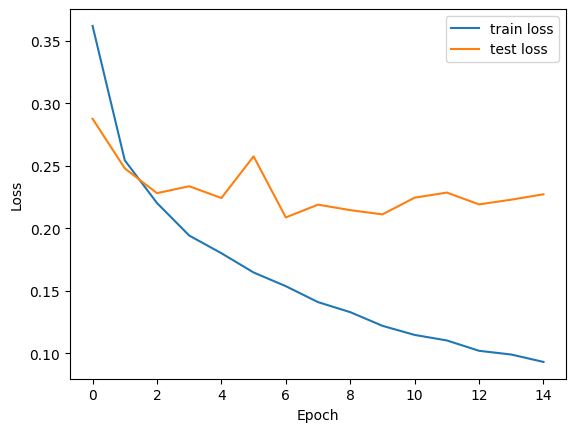

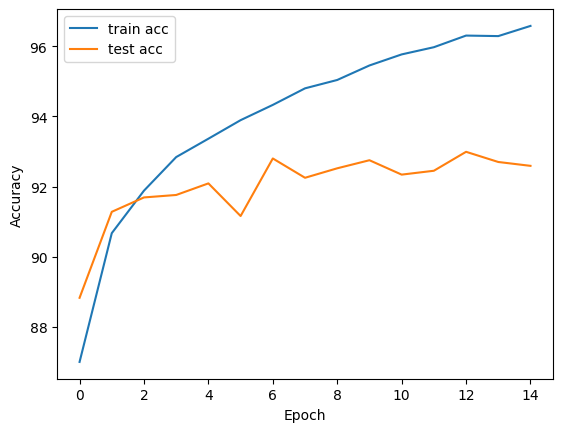

In [ ]:
EPOCHS = 15
model = Net0()
optimizer = optim.Adam(model.parameters(), lr = LEARNING_RATE, weight_decay = 0.0001)
criterion = nn.NLLLoss()
def train(model, train_dataloader, optimizer, criterion):
    model.train()
    train_loss = 0
    correct = 0
    total = 0
    patience = 0
    best_loss = None
    for batch, (data, target) in enumerate(train_dataloader):
        #***********************************
        # 请在此处添加代码，完成模型训练过程
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = output.max(1) # 取出每行最大值的索引
        total += target.size(0) # 计算总样本数
        correct += (predicted == target).sum().item() # 也可以用predicted.eq(target).sum().item()
        # 计算正确预测的样本数(predicted.eq(target)返回一个布尔值张量，sum()计算True的数量)
        #***********************************
    return train_loss / len(train_dataloader), 100. * correct / total

def test(model, test_dataloader, criterion):
    model.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch, (data, target) in enumerate(test_dataloader):
            #***********************************
            # 请在此处添加代码，完成模型测试过程
            output = model(data)
            loss = criterion(output, target)
            test_loss += loss.item()
            _, predicted = output.max(1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
            #***********************************
    return test_loss / len(test_dataloader), 100. * correct / total

def train_and_test(model, train_dataloader, test_dataloader, optimizer, criterion):
    train_loss_list = []
    train_acc_list = []
    test_loss_list = []
    test_acc_list = []
    for epoch in range(EPOCHS):
        train_loss, train_acc = train(model, train_dataloader, optimizer, criterion)
        test_loss, test_acc = test(model, test_dataloader, criterion)
        print(f"Epoch {epoch+1}/{EPOCHS}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")
        train_loss_list.append(train_loss)
        train_acc_list.append(train_acc)
        test_loss_list.append(test_loss)
        test_acc_list.append(test_acc)

    # 可视化训练过程
    plt.figure()
    plt.plot(train_loss_list, label='train loss')
    plt.plot(test_loss_list, label='test loss')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

    plt.figure()
    plt.plot(train_acc_list, label='train acc')
    plt.plot(test_acc_list, label='test acc')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.show()

    # 保存模型
    torch.save(model.state_dict(), 'model.pth')

    # 加载模型
    model = Net0()
    model.load_state_dict(torch.load('model.pth'))

train_and_test(model, train_dataloader, test_dataloader, optimizer, criterion)

在上面代码中我尝试了：

- 激活函数调整
- 正则化
- Dropout
- BatchNorm
- 网络结构调整

由于EPOCH=15较小（因为运行有点慢无法方便地使用大EPOCH），因此做法里用不了早停策略（EPOCH较大用早停才有效）
最终`Test Acc=92.59`

### 从包括但不限于以下方面对上述模型进行优化，要求至少尝试**两种**不同方面的优化方式，优化你的模型性能
- 数据增强
- 早停策略
- 激活函数调整
- 正则化
- Dropout
- BatchNorm
- 网络结构调整
- 模型集成
- 超参数调优
- 其他技巧


### 使得模型在FashionMNIST数据集上的准确率达到92%以上。